In [41]:
import pandas as pd

In [42]:
df=pd.read_csv(r"D:\data science ppt\project\insurance.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:

Q3 = df['charges'].quantile(0.75)
Q1 = df['charges'].quantile(0.25)

IQR = Q3 - Q1

LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR

print("IQR : ", IQR)
print("Q1 : ", Q1)
print("Q2 : ", df['charges'].quantile(0.5))
print("Q3 : ", Q3)
print("LowerBound : ", LowerBound)
print("UpperBound : ", UpperBound)

IQR :  11899.625365
Q1 :  4740.28715
Q2 :  9382.033
Q3 :  16639.912515
LowerBound :  -13109.1508975
UpperBound :  34489.350562499996


<Axes: >

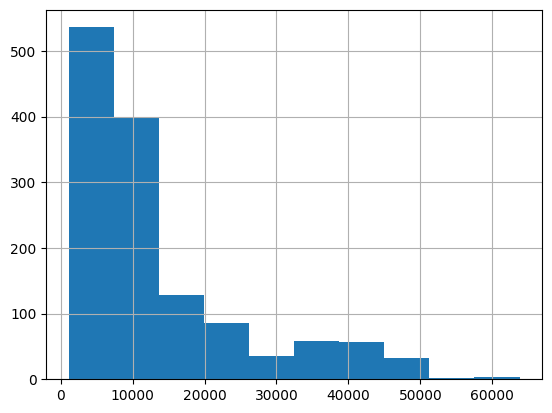

In [48]:
df['charges'].hist()

In [49]:
df[['age',	'bmi',	'children',	'charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [50]:
df['age'].cov (df['charges'])

np.float64(50874.80229785856)

In [51]:
df['age'].corr(df['charges'])

np.float64(0.29900819333064776)

In [52]:
df['age'].cov (df['bmi'])

np.float64(9.362336626407425)

In [53]:
df['age'].corr (df['bmi'])

np.float64(0.10927188154853519)

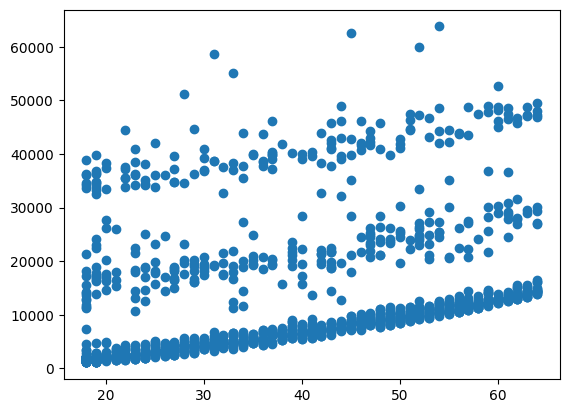

In [54]:
from matplotlib import pyplot as plt

plt.scatter(df['age'],df['charges'])

In [55]:
from sklearn.model_selection import train_test_split
df.columns = df.columns.str.strip()

X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [57]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast


In [58]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [59]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

Location-One hot encoding 
condition-label encoding 

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:

ordinal_features = ['smoker']
nominal_features=['sex','region']
numerical_columns = ['age','bmi','children']

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), nominal_features),
        ('le', OrdinalEncoder(), ordinal_features),
        ('ss', StandardScaler(), numerical_columns)
    ],
)

In [64]:

preprocessor

,transformers,"[('ohe', ...), ('le', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [65]:
preprocessor.fit_transform(df)[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        , -1.43876426, -0.45332   , -0.90861367])

In [66]:

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [68]:

pipeline.fit(X_train,y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe', ...), ('le', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
import pickle

with open("trainig2.pkl", "wb") as file:
    pickle.dump(pipeline, file)

In [70]:
with open(r"D:\data science ppt\trainig2.pkl", "rb") as f:
    pipeline = pickle.load(f)

print(pipeline.predict(X_test))

[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656 10864.11316424   170.28084136 16903.45028662
  1092.43093614 11218.34318352 28101.68455267  9377.73460205
  5263.0595179  38416.04221107 40255.82339284 37098.25353123
 15240.39392306 35912.88264434  9112.52398703 31461.92108909
  3847.68845883 10130.12001517  2370.54189389  7140.21550828
 11301.76782638 12961.65366224 14509.47251876  6159.8976107
  9963.85857263  2177.85718217  9115.93673493 13073.68932159
  4561.82376202  3408.20756033  4459.81359745 13032.06505076
  1979.99357292  8813.28303302 33271.29124448 32585.51583927
  3908.76090964  4326.10774721 14142.81326533 11423.45494846
  8774.13955311 12097.28051001  5281.57353499  3150.5596042
 35494.46461214  9150.1124786  15836.84575621  2343.57470069
 12364.78414194  1482.29488266 13389.06105161 12573.57395972
  4341.83680558 32165.33688042 13321.3360032  12896.82071102
 14167.99421483 10506.17623512 16360.78543548  7763.89824584
 11839.25019431  4061.1975

In [71]:
X_test['Price'] = y_test

In [72]:
X_test['Prediction'] = pipeline.predict(X_test)

In [73]:
X_test

,age,sex,bmi,children,smoker,region,Price,Prediction
764,45,female,25.175,2,no,northeast,9095.06825,8969.550274
887,36,female,30.020,0,no,northwest,5272.17580,7068.747443
890,64,female,26.885,0,yes,northwest,29330.98315,36858.410912
1293,46,male,25.745,3,no,northwest,9301.89355,9454.678501
259,19,male,31.920,0,yes,northwest,33750.29180,26973.173457
...,...,...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast,47055.53210,39061.500932
575,58,female,27.170,0,no,northwest,12222.89830,11761.499198
535,38,male,28.025,1,no,northeast,6067.12675,7687.563632
543,54,female,47.410,0,yes,southeast,63770.42801,40920.291512


In [74]:
X_test['Actual_Error'] = X_test['Price'] - X_test['Prediction']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Price']

In [75]:
X_test['Absolute_Percentage_Error'].mean()

np.float64(0.4688825597914705)

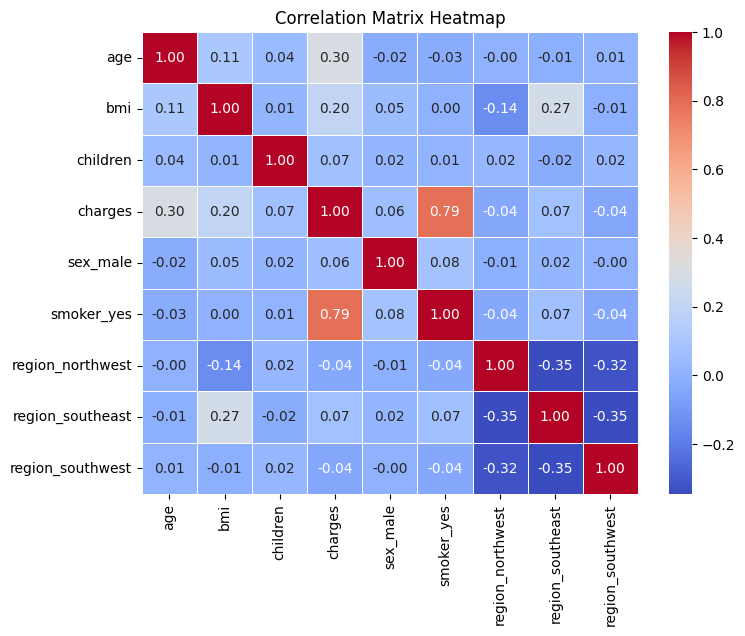

In [76]:
# Convert categorical → numerical
df_encoded = pd.get_dummies(df, drop_first=True)  

plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

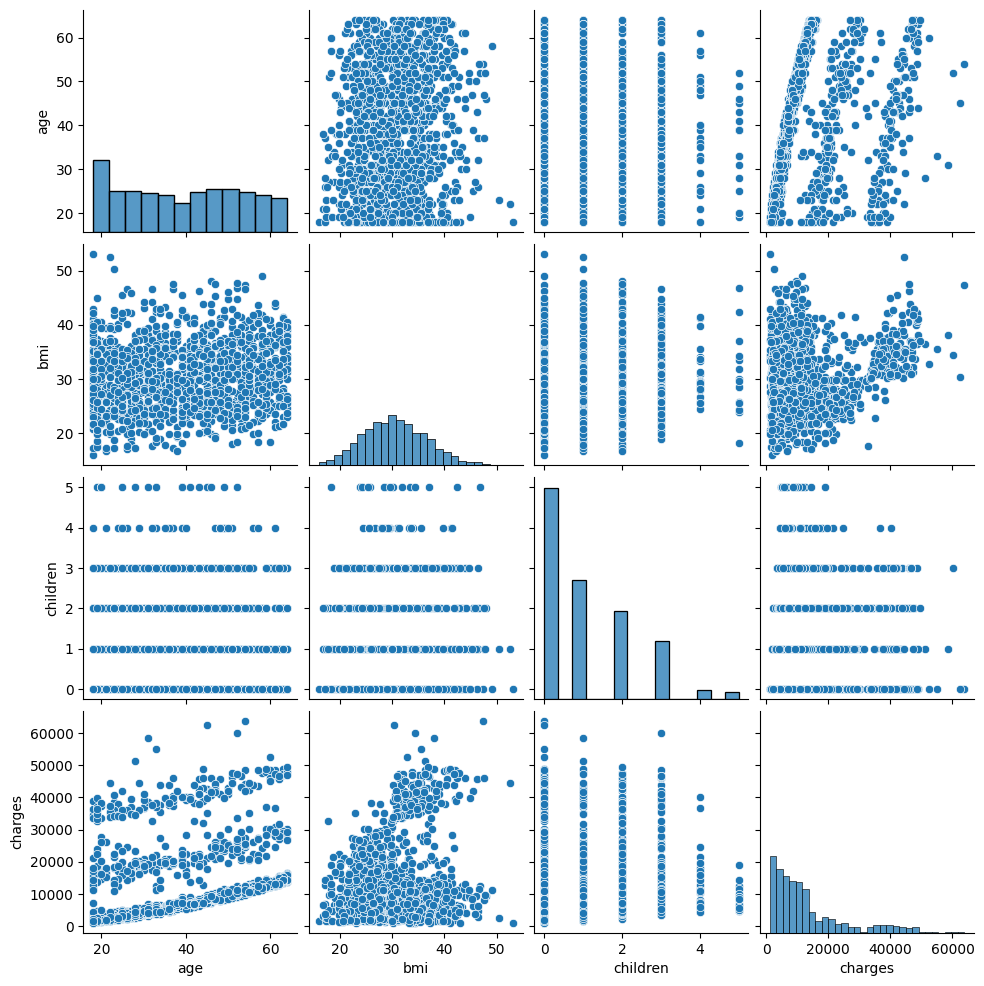

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df.select_dtypes(include='number'))
plt.show()
